# Homework 4: Natural Language Processing

## The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, puctuation, etc. of written sentences.
- 10 pt: Codes are written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

In [2]:
MY_UNIQNAME = 'austinam'

In [ ]:
collaborated_with = ['iviev', 'dimac', 'shruthis', 'yaskarba', 'mcsant']

# Download the data:
We will be using a subset of the data from [Project Gutenberg](http://www.gutenberg.org).

>Project Gutenberg is a volunteer effort to digitize and archive cultural works, to "encourage the creation and distribution of eBooks". It was founded in 1971 by American writer Michael S. Hart and is the oldest digital library. Most of the items in its collection are the full texts of public domain books. The project tries to make these as free as possible, in long-lasting, open formats that can be used on almost any computer., Project Gutenberg reached 57,000 items in its collection of free eBooks.

We will use a [cleaned up corpus](https://github.com/aparrish/gutenberg-dammit) that was processed by [Allison Parish](https://www.decontextualize.com/). This processing step was done to standardize metadata and text encoding. The dataset is described on the [project page](https://github.com/aparrish/gutenberg-dammit#gutenberg-dammit). Note that there are plain text files withing subdirectories numbered with the first three digits of the document ID, and there is also a JSON file of document metadata with title, author, and other information.


We created a reduced subset of 4000 documents for the purpose of this assignment that can be downloaded below:

https://drive.google.com/file/d/1V5ep_5veAccCD-YxGlVfv3DsXczBIvv5/view?usp=sharing

This ZIP file is approximately 550 MB compressed, and 1.45 GB uncompressed.

## Q1. (10 pts.) Data cleaning
- (3 pts.) Import the downloaded data
- (2 pts.) Convert to lowercase
- (2 pts.) Remove stopwords 
- (2 pts.) Remove punctuation and any other non-alphabet characters

In [30]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import spacy
import glob
import os
os.linesep
import shutil
import pathlib
import gensim
#pathlib.Path.cwd()

In [31]:
nlp = spacy.load('en')

In [3]:
path = '/Users/AmyAustin/Desktop/618/HW4New/gutenberg-dammit-files/'
filelist = []
txt_info = []
for dir,subdir,files in os.walk(path):
    for file in files:
        if glob.fnmatch.fnmatch(file, '*.txt'):
            path_to_read = dir+ '/' + file
            filelist.append(path_to_read)

for file in filelist:
    with open(file) as files:
        content = files.read()
        txt_info.append(content)

sample = txt_info[0]

In [32]:
#lowercase
new_text = []
for thing in txt_info:
    new = thing.lower()
    new_text.append(new)

In [52]:
#no punctuation
newest_text = []
for thing in new_text:
    no_punc = re.sub(r'[^\w\s]', ' ', thing)
    no_punc_new = no_punc.replace(os.linesep, " ")
    newest_text.append(no_punc)

In [53]:
#no linebreak
new_text_no_break = []
for thing in newest_text:
    no_punct = thing.replace(os.linesep, " ")
    new_text_no_break.append(no_punct)

In [54]:
#no numbers
no_num_text = []
for thing in new_text_no_break:
    nonum = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", thing)
    no_num_text.append(nonum)

In [337]:
#no_num_text[0]

In [56]:
from spacy.lang.en.stop_words import STOP_WORDS

In [64]:
from nltk.corpus import stopwords

In [67]:
#no stopwords
lists_of_words = []
for thing in no_num_text:
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    text = pattern.sub('', thing)
    lists_of_words.append(text)

In [338]:
#lists_of_words[0]

In [301]:
gutenberg_df = pd.read_json('gutenberg-dammit-files/gutenberg-metadata.json')
gutenberg_df.sort_values('Num').head(2)

,Author,Author Birth,Author Death,Author Given,Author Surname,Copyright Status,Language,LoC Class,Num,Subject,Title,charset,gd-num-padded,gd-path,href
3093,"[Joseph Smith, Church of Jesus Christ of Latte...","[1805, ?]","[1844, ?]","[Joseph, ?]","[Smith, ?]",[Not copyrighted in the United States.],[English],"[BX: Philosophy, Psychology, Religion: Christi...",17,"[Mormons, Religion]",[The Book of Mormon],us-ascii,17,000/00017.txt,/1/17/17.zip
987,[United States. Central Intelligence Agency],[?],[?],[?],[?],[Not copyrighted in the United States.],[English],"[G: Geography, Anthropology, Recreation]",48,"[Political statistics -- Handbooks, manuals, e...",[The 1992 CIA World Factbook],utf-8,48,000/00048.txt,/etext93/world192.zip


## Q2. (10 pts.) Frequency of Part of Speech (POS) tags
- Use spaCy
  - Use the original (or uncleaned) documents. spaCy does POS tagging better when the sentence is more complete. 
- (4 pts.) Extract POS tags from the first 100 sentences of selected 5 books. 
- (4 pts.) Plot the frequency of POS tags
- (2 pts.) Provide your interpretation

In [73]:
from collections import Counter

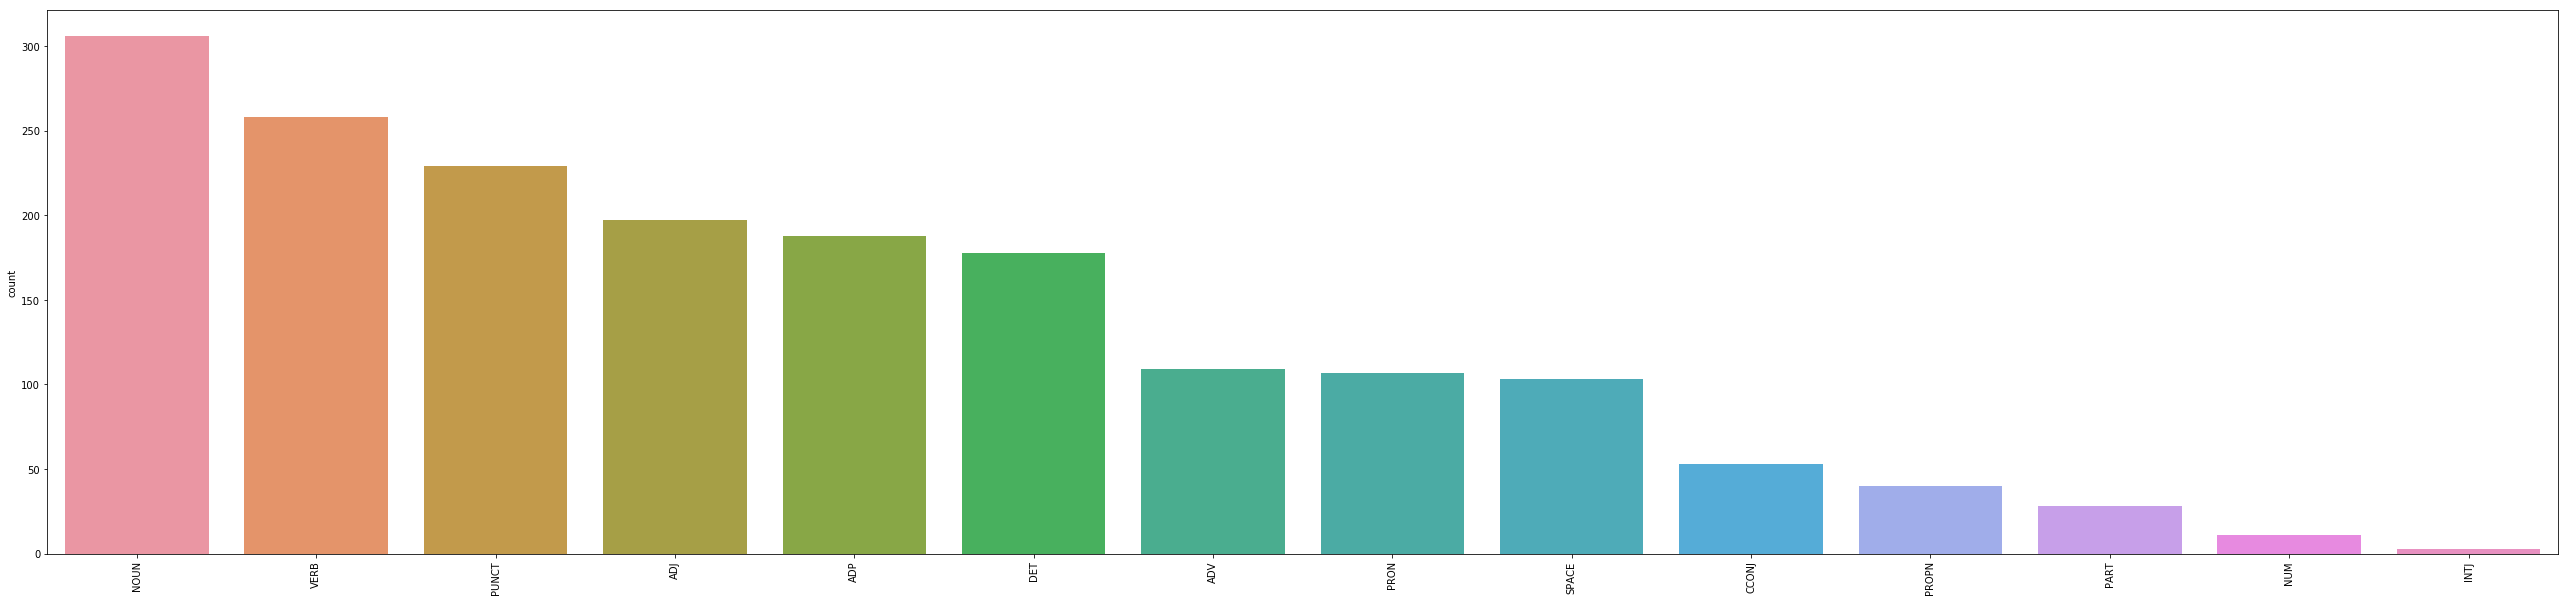

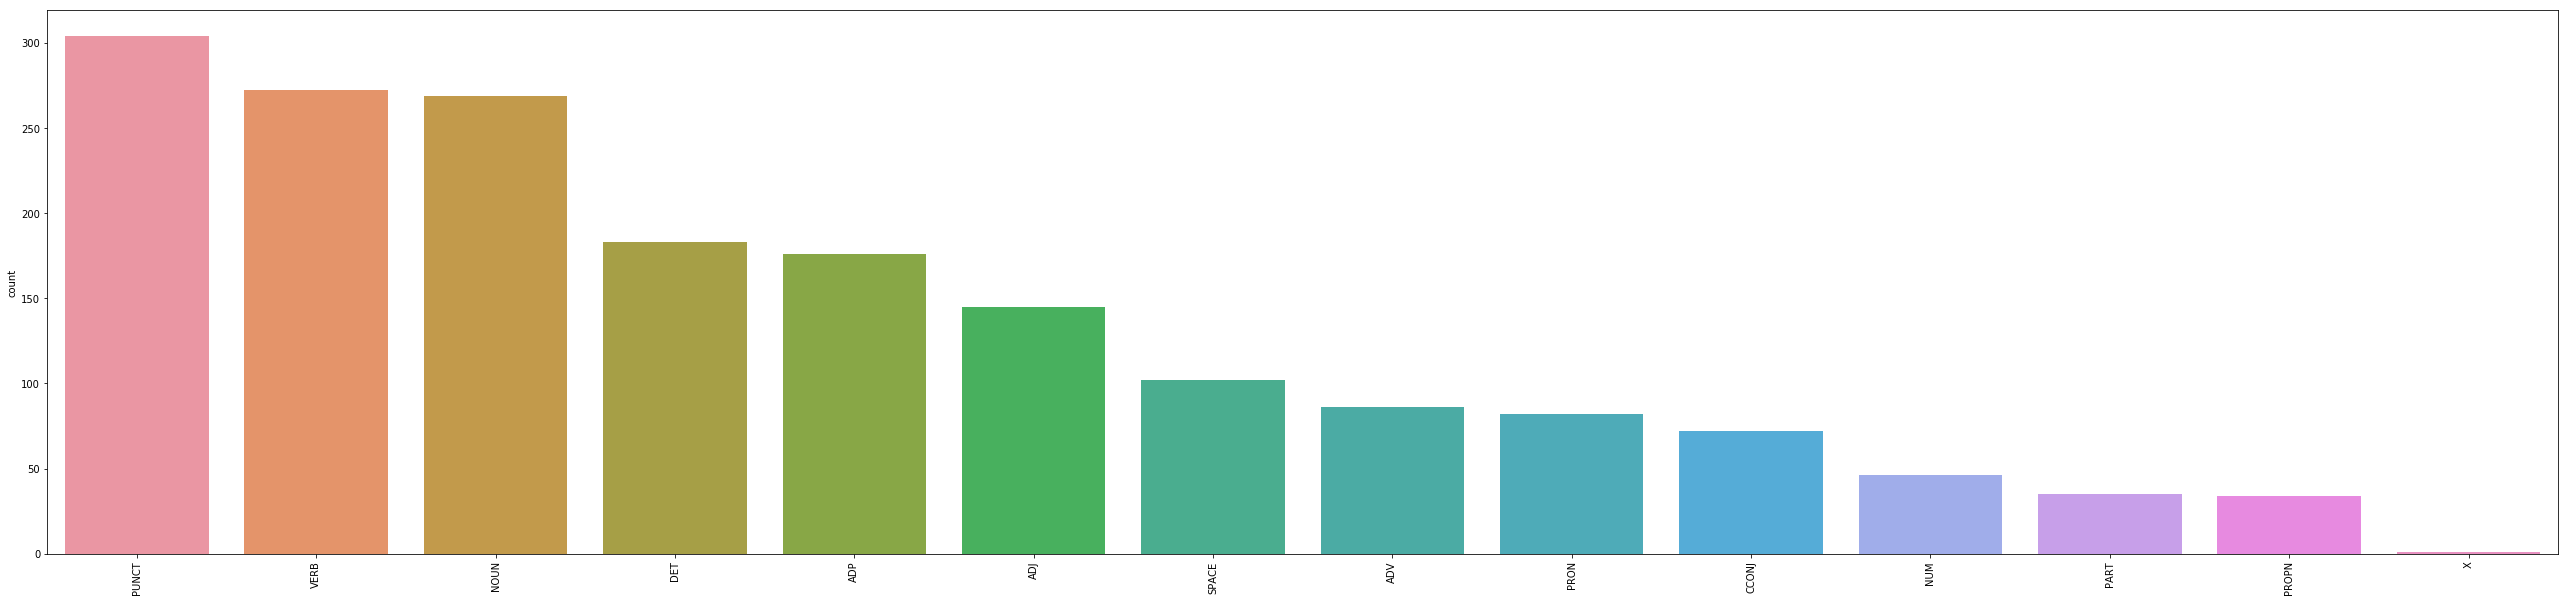

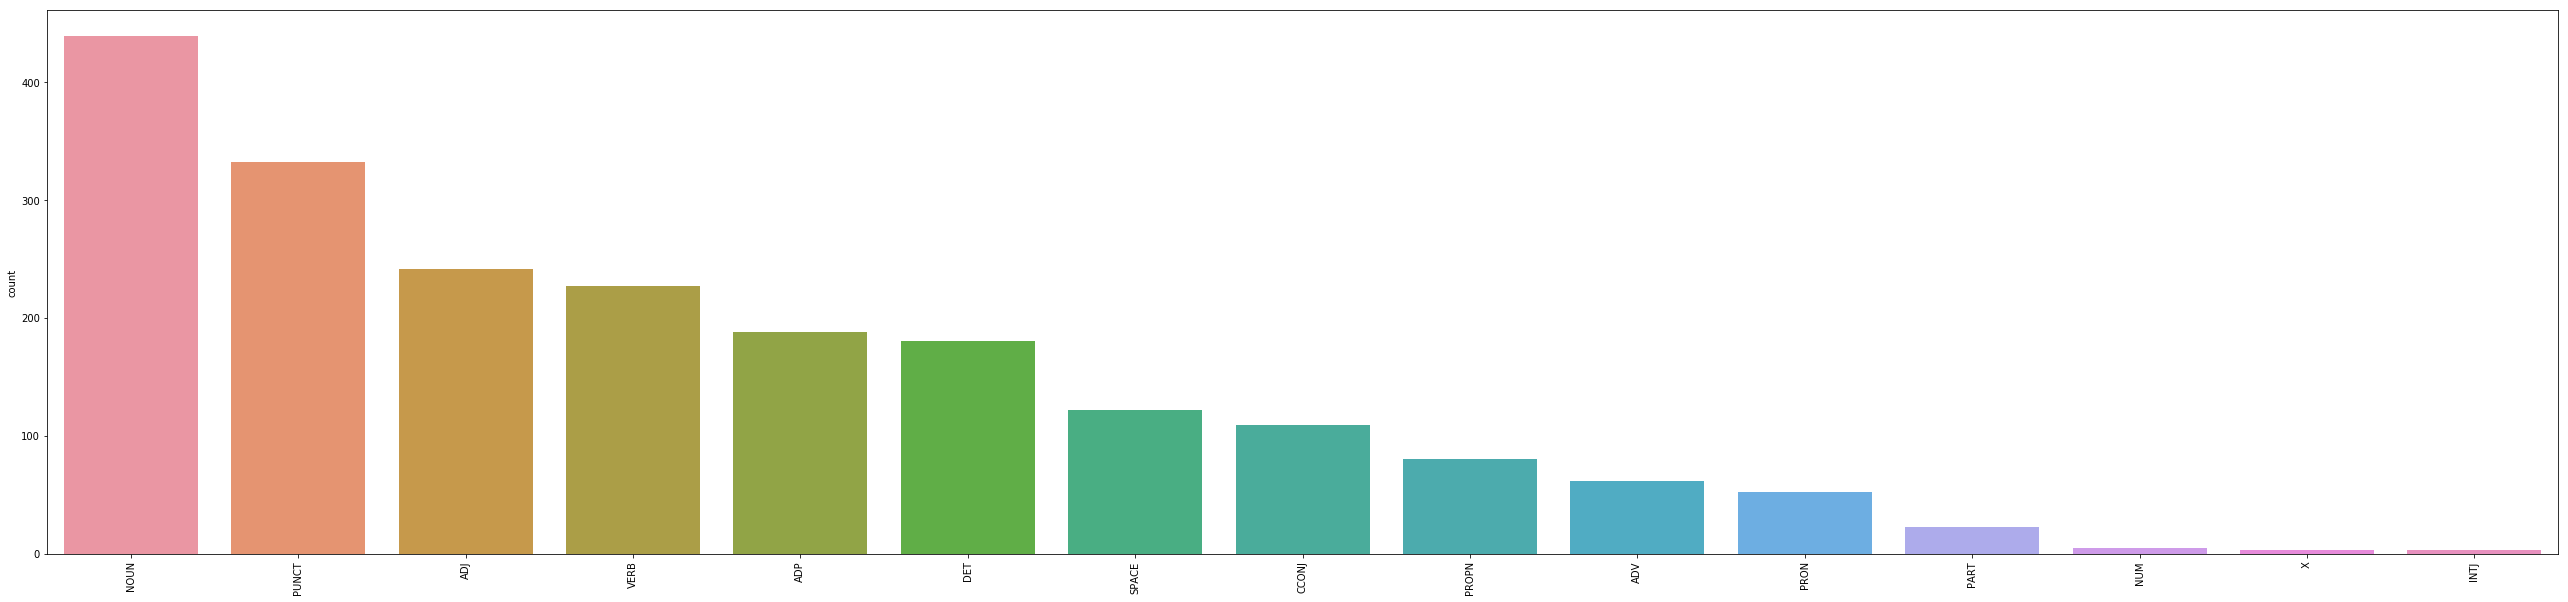

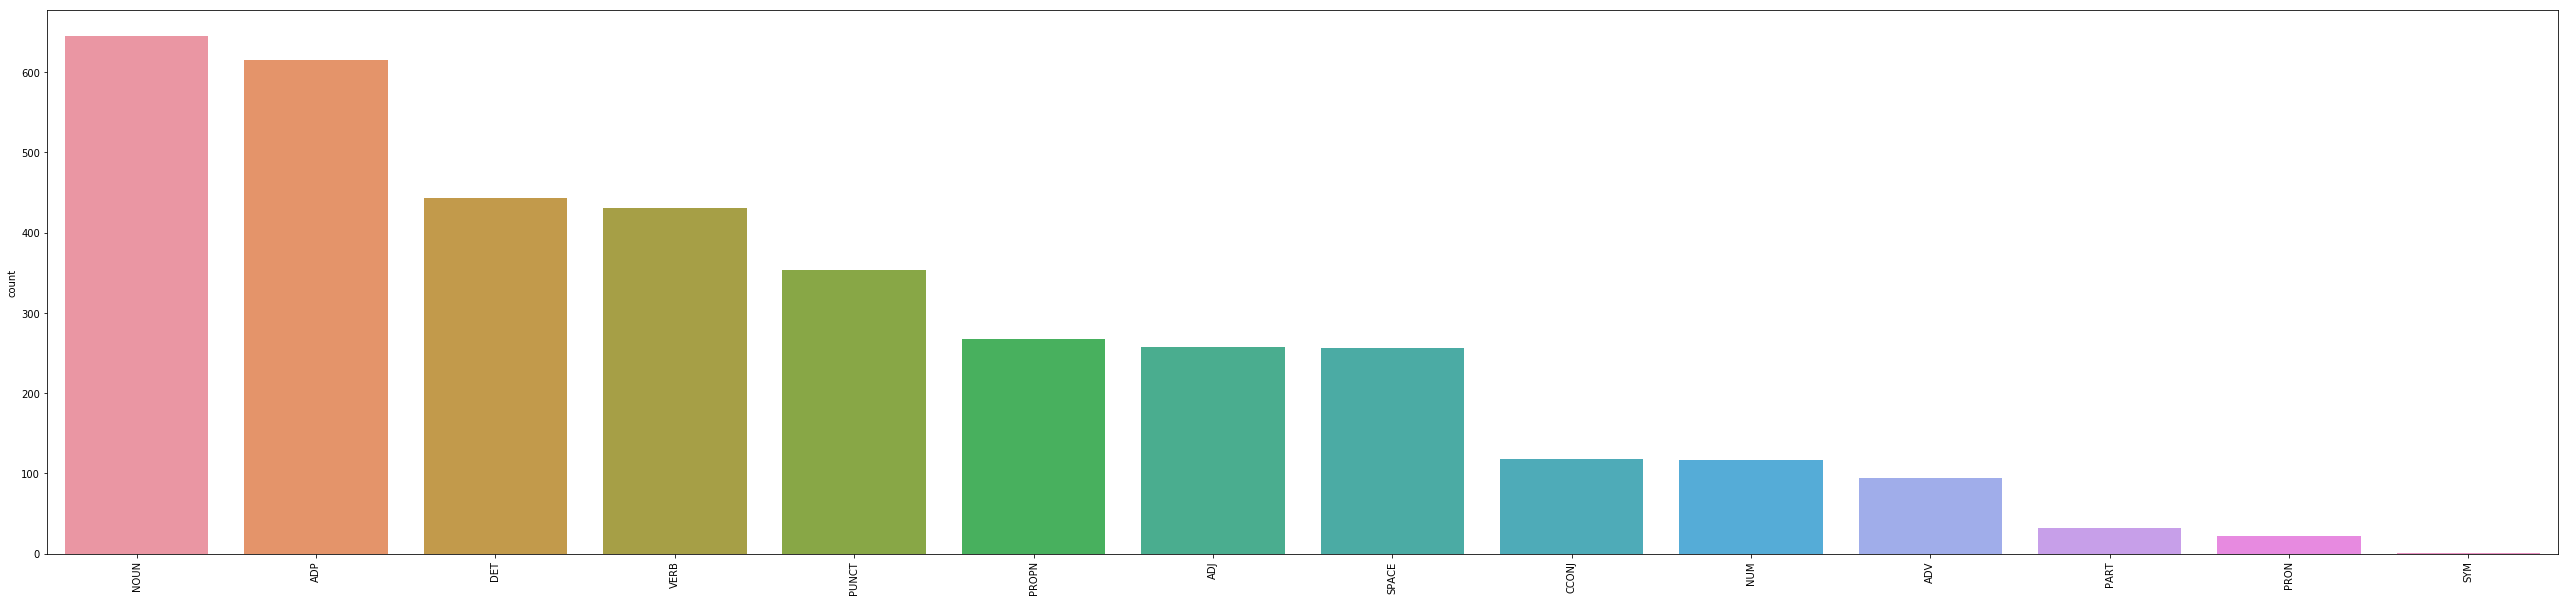

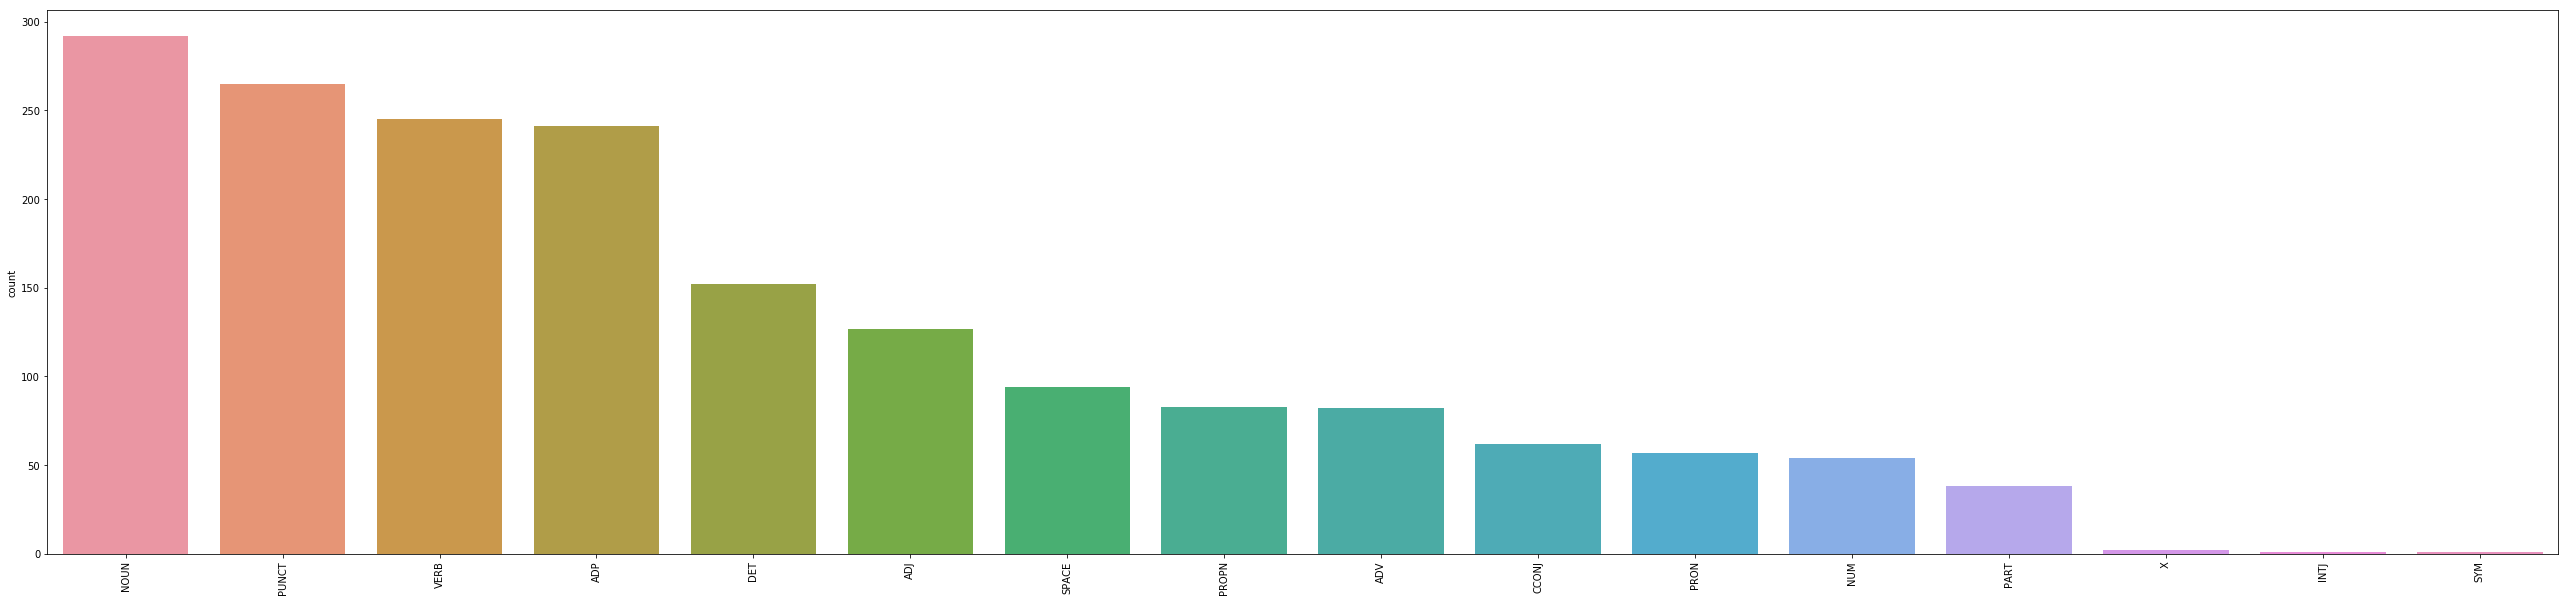

Full Graph


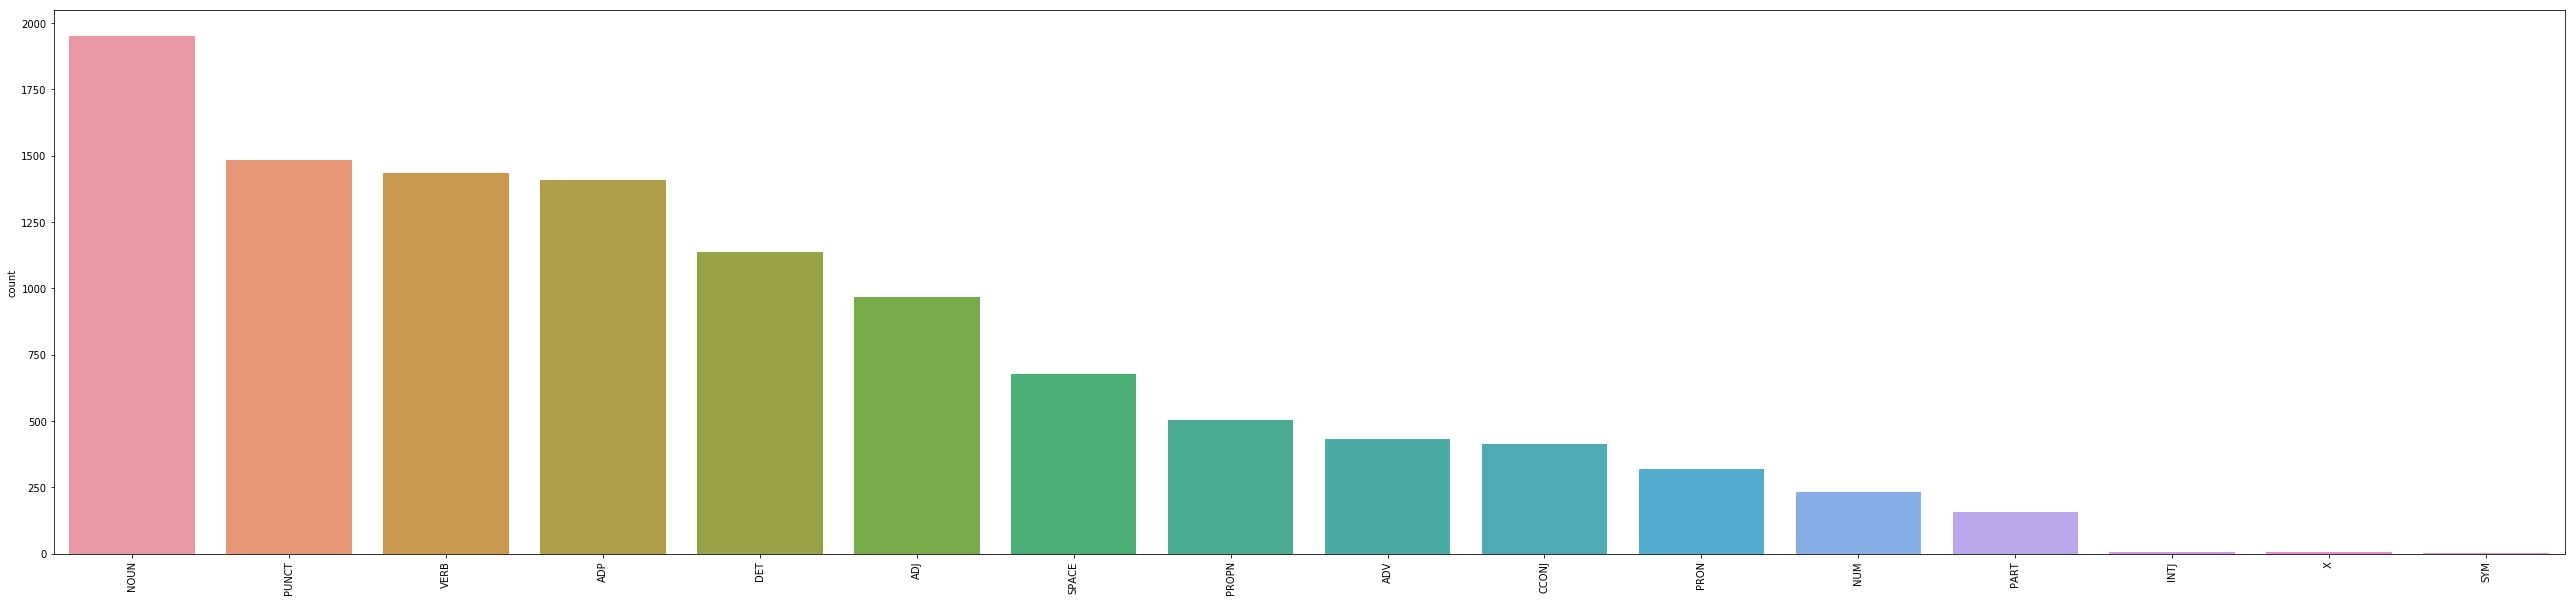

In [336]:
full_list = []
five_books = txt_info[9:14]
for book in five_books:
    doc = nlp(book)
    sentences = [sent.string.strip() for sent in doc.sents][:100]
    minidoc = nlp(' '.join(sentences))
    #minidoc.sents
    lst = []
    for i, sent in enumerate(minidoc.sents):
        for token in sent:
            tk = token.text, "\t", token.pos_
            lst.append(tk[2])
            full_list.append(tk[2])
    Counter(lst).most_common()
    plt.figure(figsize=(45,10))
    sns.countplot(lst, order=pd.Series(lst).value_counts().index)
    # sns.countplot(words_nostop, order=[counted[0] for counted in Counter(words_nostop).most_common()])
    plt.xticks(rotation=90)
    plt.show()
    
print('Full Graph')
Counter(full_list).most_common()
plt.figure(figsize=(45,10))
sns.countplot(full_list, order=pd.Series(full_list).value_counts().index)
# sns.countplot(words_nostop, order=[counted[0] for counted in Counter(words_nostop).most_common()])
plt.xticks(rotation=90)
plt.show()

For all but one of the books, the most common part of speech in the first 100 sentences was Noun. For the book in which noun was not the most common part of speech, punctuation was the most common, followed by verb. Verbs and punctuation were very common in the other books, as well. The books differed on what was the least common part of speech, but overall symbols, interjections, and foreign words were the least common.

## Q3. (10 pts.) Make wordclouds for 5 books
- Use the [```word_cloud```](https://github.com/amueller/word_cloud) package.
- (8 pts.) Create a wordcloud for 5 books that you choose.
  - The author of each book should be different.
- (2pts.) Provide your interpretation.

In [70]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [325]:
gutenberg_df.sort_values('Num').head(5)

,Author,Author Birth,Author Death,Author Given,Author Surname,Copyright Status,Language,LoC Class,Num,Subject,Title,charset,gd-num-padded,gd-path,href
3093,"[Joseph Smith, Church of Jesus Christ of Latte...","[1805, ?]","[1844, ?]","[Joseph, ?]","[Smith, ?]",[Not copyrighted in the United States.],[English],"[BX: Philosophy, Psychology, Religion: Christi...",17,"[Mormons, Religion]",[The Book of Mormon],us-ascii,17,000/00017.txt,/1/17/17.zip
987,[United States. Central Intelligence Agency],[?],[?],[?],[?],[Not copyrighted in the United States.],[English],"[G: Geography, Anthropology, Recreation]",48,"[Political statistics -- Handbooks, manuals, e...",[The 1992 CIA World Factbook],utf-8,48,000/00048.txt,/etext93/world192.zip
120,[Jean Armour Polly],[?],[?],[Jean Armour],[Polly],[Copyrighted work. See license inside work.],[English],[QA: Science: Mathematics],56,"[United States, National Research and Educatio...",[NREN],us-ascii,56,000/00056.txt,/etext93/nren210.zip
731,[Edgar Rice Burroughs],[1875],[1950],[Edgar Rice],[Burroughs],[Not copyrighted in the United States.],[English],[PS: Language and Literatures: American and Ca...,64,"[Mars (Planet) -- Fiction, Science fiction]",[The Gods of Mars],us-ascii,64,000/00064.txt,/6/64/64.zip
2797,[Canada],[?],[?],[?],[?],[Not copyrighted in the United States.],[English],"[KDZ: Law in general, Comparative and uniform ...",89,"[Free trade -- United States, Free trade -- Me...","[North American Free Trade Agreement, 1992 Oct...",ibm437,89,000/00089.txt,/etext93/naftannx.zip


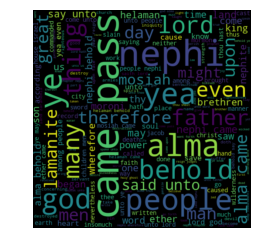

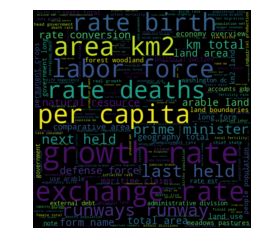

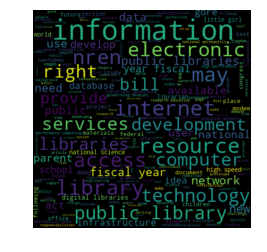

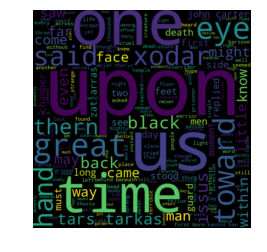

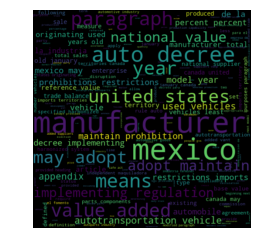

In [326]:
five_books = lists_of_words[:5]
for book in five_books:
    wordcloud = WordCloud(width=500, height=500, margin=0).generate(book)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()


For the first wordcloud, which is for The Book of Mormon, it makes sense that some of the most common words are lord, behold and god. For the second wordcloud, which is for a CIA world fact book, it makes sense things like per capita and labor force appear frequently. For the third book, which is about science, many of the common words are information-related. For the fourth book, the Gods of Mars, upon is the most frequent word, followed by us and time. The last book is about North American trade, so it is not surprising that many of the most common words are countries in North America and manufacturer. 

## Q4. (bonus 5 pts.) Train your own word2vec vector.
- Use the ```gensim``` package
  - Your input will be the output from Q1 (cleaned data)
- Hint: You can look into this tutorial for training the new Word2Vec model: https://rare-technologies.com/word2vec-tutorial/
- Use default parameters when you train the Word2Vec model (e.g., ```min_count```, ```size```, etc.), except the number of workers (```workers=?```) parameter.
- Use this model for the later questions. 
  - **If you do not have your Word2Vec model, please use the pre-trained model that we used for the lab to answer the later questions**

## Q5. (10 pts.) Similarity from Word2Vec 
- Choose 5 words
- (5pts.) What are the top-10 similar words of each?
- (5pts.) Do you find anything odd or interesting? Please explanation. 
  - (if you have your own word2vec model)How the results are different from the pre-trained model that we used in the lab?

In [5]:
w2v_mod = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300-SLIM.bin", binary=True)

In [274]:
five_words = ['happy', 'USA', 'wine', 'summer', 'book']

for word in five_words:
    lst = []
    print(word)
    for i in range(10):
        lst.append(w2v_mod.most_similar(positive=[word])[i][0])
    print(lst)

happy
['glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited']
USA
['U.S.A.', 'America', 'Canada', 'Italy', 'World', 'Usa', 'Netherlands', 'Germany', 'Slovenia', 'Switzerland']
wine
['wines', 'chardonnay', 'pinot', 'vino', 'merlot', 'Wine', 'Chardonnay', 'winery', 'winemaker', 'winemakers']
summer
['spring', 'winter', 'summertime', 'summers', 'autumn', 'weekend', 'week', 'Summer', 'springtime', 'month']
book
['tome', 'books', 'memoir', 'autobiography', 'memoirs', 'Book', 'paperback', 'novels', 'hardback', 'cookbook']


The results for the five words I chose were overall, not surprising. For 'happy', most of the similar words are other positive emotions, with one negative one (disappointed). For 'USA', U.S.A. and America were the most similar, followed mostly by other countries. For 'wine', the most similar words were types of wine, followed by other words that contain the word 'wine.' For 'summer' most of the similar words were words that had 'summer' in it or other seasons. I was slightly surprised to see 'tome' as being the most similar word to book, but I discovered that a tome is "a book, especially a large, heavy, scholarly one."

## Q6. (15 pts.) Similarity between chapters 
- (5 pts.) Pick 5 chapters from the dataset and describe.
  - Each "chapter" consists of 10 consecutive paragraphs from a single book.
  - The author of each chapter should be different.
  - If necessary, explain how you defined "paragraph". 
- (5 pts.) Calculate the average of vectors for the words included in a chapter.  
  - In this way, you can have a vector that can roughly summarize the contents.    
  - The average vector should have the same dimensionality with word vectors 
    - e.g., if the word vector is a 100 dimension, the average vector for paragraph should be a 100 dimension as well
  - Words should come from the results of Q1 (cleaned out data) (i.e. should not contain stopwords or other special characters).
- (5 pts.) Calculate the similarity between chapters.  
  - Provide your interpretation. 
  - Why do you think some chapters are similar/dissimilar to others?

In [331]:
sorted_df = gutenberg_df.sort_values('Num')
sorted_df.head(5)
#last five are the ones being used for this 

,Author,Author Birth,Author Death,Author Given,Author Surname,Copyright Status,Language,LoC Class,Num,Subject,Title,charset,gd-num-padded,gd-path,href
3093,"[Joseph Smith, Church of Jesus Christ of Latte...","[1805, ?]","[1844, ?]","[Joseph, ?]","[Smith, ?]",[Not copyrighted in the United States.],[English],"[BX: Philosophy, Psychology, Religion: Christi...",17,"[Mormons, Religion]",[The Book of Mormon],us-ascii,17,000/00017.txt,/1/17/17.zip
987,[United States. Central Intelligence Agency],[?],[?],[?],[?],[Not copyrighted in the United States.],[English],"[G: Geography, Anthropology, Recreation]",48,"[Political statistics -- Handbooks, manuals, e...",[The 1992 CIA World Factbook],utf-8,48,000/00048.txt,/etext93/world192.zip
120,[Jean Armour Polly],[?],[?],[Jean Armour],[Polly],[Copyrighted work. See license inside work.],[English],[QA: Science: Mathematics],56,"[United States, National Research and Educatio...",[NREN],us-ascii,56,000/00056.txt,/etext93/nren210.zip
731,[Edgar Rice Burroughs],[1875],[1950],[Edgar Rice],[Burroughs],[Not copyrighted in the United States.],[English],[PS: Language and Literatures: American and Ca...,64,"[Mars (Planet) -- Fiction, Science fiction]",[The Gods of Mars],us-ascii,64,000/00064.txt,/6/64/64.zip
2797,[Canada],[?],[?],[?],[?],[Not copyrighted in the United States.],[English],"[KDZ: Law in general, Comparative and uniform ...",89,"[Free trade -- United States, Free trade -- Me...","[North American Free Trade Agreement, 1992 Oct...",ibm437,89,000/00089.txt,/etext93/naftannx.zip


In [339]:
books_to_use = txt_info[:5]
clean_book_chp = []
for book in books_to_use:
    list_of_par = []
    chp_str = ''
    book_split = book.split('\n\n')
    for thing in book_split:
        if '\n' in thing:
            list_of_par.append(thing)
    chapter = list_of_par[:10]
    for par in chapter:
        chp_str = chp_str + ' ' + par
    chp_str
    chp_clean = chp_str.replace(os.linesep, " ")
    chp_clean
    clean_book_chp.append(chp_clean)
#clean_book_chp[0]

In [333]:
lst_clean_chp = []
for chp in clean_book_chp:
    nonum = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", chp)
    no_punc = re.sub(r'[^\w\s]', ' ', nonum)
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    text = pattern.sub('', no_punc)
    clean_chapters = text.lower()
    lst_clean_chp.append(clean_chapters)
#lst_clean_chp

In [334]:
list_avg = []
for book_chp in lst_clean_chp: 
    words_in_par = []
    splt = book_chp.split()
    for word in splt:
        if word not in w2v_mod.vocab:
            continue
        words_in_par.append(w2v_mod[word]) 
    average = np.average(np.array(words_in_par), axis=0)
    list_avg.append(average)
#list_avg[0]

In [335]:
for i in range(5):
    for n in range(5):
        if i != n and i < n:
            print(i, n)
            a = list_avg[i]
            b = list_avg[n]
            print(a.dot(b) / (np.sqrt(np.sum(np.power(a, 2))) * np.sqrt(np.sum(np.power(b, 2)))))

0 1
0.7166418
0 2
0.6954919
0 3
0.84956723
0 4
0.6545622
1 2
0.7574829
1 3
0.7345258
1 4
0.81935406
2 3
0.747695
2 4
0.7492019
3 4
0.6581576


In order to find paragraphs in the book, I split the book on /n/n, which were areas in which there was a blank space between lines. After inspecting my data, in order to ensure that the results from this were actual paragraphs and not things like the title of the book or chapter, I only kept things that spanned more than one line. I then defined a chapter as being 10 paragraphs. I then cleaned the data, removing things like stopwords, punctuation, and numbers.

The books with the most similar chapters was between the first book (The Book of Mormon) and the fourth book (The Gods of Mars). Both of these books seem to have some sort of basis in religion, so it is not surprising that they are the most similar. The Book of Mormon and the book on North American trade are the least similar, as they are on very different topics. Chapters may be similar or disimilar from each other based on topic, time they were written, or genre.

## Q7. (15 pts.) Identify biases in word embeddings
- (8pts.) Which words from the model show the strongest skew along the each bias scales?
  - hint: Look for the interpretable semantic scaling part from the last Lab (Section 2-3)
  - Search for the words from your Word2Vec model that would locate in the scale's each end
    - e.g., which words are more male/female? 
  - Use following semantic scales
    - *Gender (female:male)*
    - *Age (young:old)*
  - Provide your interpretation
- (7pts.) Pick the top 100 similar words with the word *information*. 
  - Plot these words in a 2-dimensional scale. 
  - Each axis is a bias scale from above (gender and age). 
  - Provide your interpretation


In [ ]:
#look for words that are most similar to male and female (5 for each)
#--- was told only looking at 5 was ok in office hours

In [218]:
from scipy import spatial
 
def cosine_similarity(x, y):
    return(1 - spatial.distance.cosine(x, y))

In [277]:
fem = w2v_mod.most_similar(positive=['female'])
top_5_fem = fem[:5]
print(top_5_fem)
male = w2v_mod.most_similar(positive=['male'])
top_5_male = male[:5]
top_5_male

[('male', 0.8405333757400513), ('Female', 0.7159764766693115), ('females', 0.6656177639961243), ('males', 0.5729262828826904), ('women', 0.5556280612945557)]


[('female', 0.8405333161354065),
 ('males', 0.7579617500305176),
 ('females', 0.7030534744262695),
 ('Male', 0.6288970708847046),
 ('Female', 0.5971192121505737)]

In [225]:
old = w2v_mod.most_similar(positive=['old'])
top_5_old = old[:5]
print(top_5_old)
young = w2v_mod.most_similar(positive=['young'])
top_5_young = young[:5]
top_5_young

[('boy', 0.58281409740448), ('daughter', 0.5281769633293152), ('son', 0.5190994143486023), ('girl', 0.5054707527160645), ('olds', 0.5024389624595642)]


[('teenage', 0.6431925296783447),
 ('younger', 0.635094165802002),
 ('teenaged', 0.6070023775100708),
 ('impressionable', 0.5947336554527283),
 ('youth', 0.5715782046318054)]

In [226]:
w2v_mod.most_similar(positive=['information'], topn=100)
lst_sim = []
for i in range(100):
    lst_sim.append(w2v_mod.most_similar(positive=['information'], topn=100)[i][0])

In [235]:
lst_for_pd = []
indx = []
for word in lst_sim:
    lst_for_pd.append([cosine_similarity(w2v_mod[word], w2v_mod['female']), cosine_similarity(w2v_mod[word], w2v_mod['male'])])
    indx.append(word)
df = pd.DataFrame(lst_for_pd, index=indx, columns=['female', 'male'])
df.head()

,female,male
info,0.016588,-0.004822
informationon,0.009880,-0.008636
Information,-0.010672,-0.007543
details,-0.032860,-0.024264
data,0.008963,0.053522


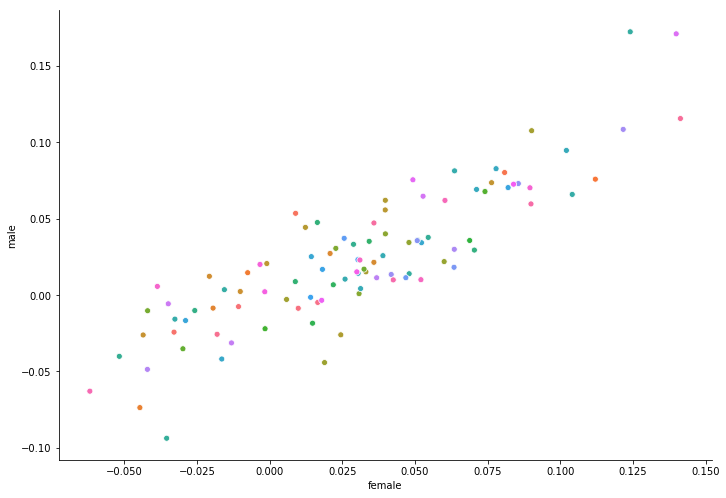

In [286]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)  
sns.scatterplot(x='female', y='male', data=df, hue=df.index, legend=None)
sns.despine()

In [244]:
lst_for_pd2 = []
indx2 = []
for word in lst_sim:
    lst_for_pd2.append([cosine_similarity(w2v_mod[word], w2v_mod['old']), cosine_similarity(w2v_mod[word], w2v_mod['young'])])
    indx2.append(word)
df2 = pd.DataFrame(lst_for_pd2, index=indx2, columns=['old', 'young'])
df2.head()

,old,young
info,-0.064372,-0.005752
informationon,-0.091315,-0.041600
Information,-0.032040,-0.046439
details,-0.097730,-0.020312
data,-0.076039,-0.074401


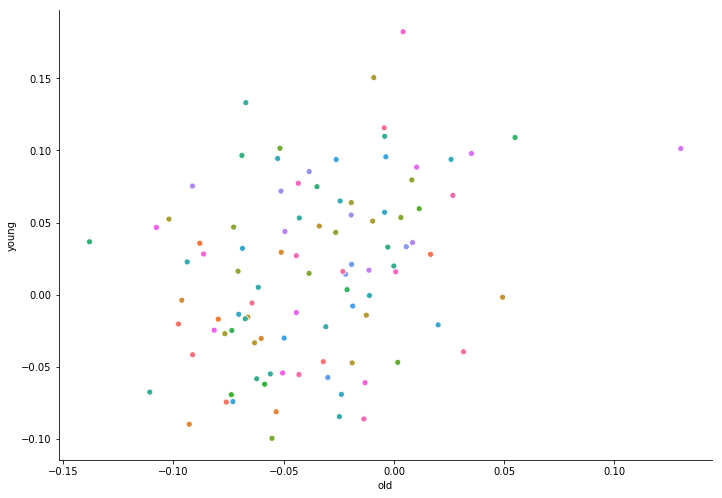

In [287]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27) 
sns.scatterplot(x='old', y='young', data=df2, hue=df2.index, legend=None)
sns.despine()

The top five words associated with both male and female were other forms of saying the word, like women or males. It was interesting that the opposite gender was the most similar to each word, followed by other ways of saying female or male.

For old, the most similar word was boy, followed by daughter and son, which surprised me, as I would expect these words would be associated with the word young. For young, the most similar words made more sense, including things like teenage and youth.

There is a clear, positive relationship between the words most similar to information and how similar to male and female they are. As the similarity to female increases, the similarity to male also increases.

There is not a clear relationship between the words most similar to information and how similar to old and young they are. This makes sense; if a word is similar to something to do with a person, it would most likely be similar to both male and female. As things that are associated with old are not always associated with young, it makes sense that there would be no relationship in this graph.

## Q8. (10 pts.) Word clustering
- Pick top-100 similar words with the word *information*.  
- Calculate cosine similarity scores between words
  - e.g., Create a 100x100 matrix that contains cosine similarity scores. Each row and columns should be words. 
- Use seaborn's [```.clustermap()```](https://seaborn.pydata.org/generated/seaborn.clustermap.html) function to draw a hierarchically-clustered heatmap
- Provide your interpretation

In [295]:
w2v_mod.most_similar(positive=['information'], topn=100)
lst_sim = []
for i in range(100):
    lst_sim.append(w2v_mod.most_similar(positive=['information'], topn=100)[i][0])
len(lst_sim)

100

In [296]:
top100 = []
list_sim_words = []
for i in range(100):
    word_similarities = []
    for n in range(100):
        word_similarities.append(w2v_mod.similarity(lst_sim[i], similar_list[n]))
    list_sim_words.append(word_similarities)

similarity_matrix = np.reshape(list_sim_words, (100, 100))
cols = lst_sim
rows = similar_list
sim_df = pd.DataFrame(similarity_matrix, columns=cols, index=rows)
sim_df

,info,informationon,Information,details,data,TENFOLD,contact,Details,updates,availableat,...,Enquiries,transcripts,informative,accurate,maps,secrets,discloser,please,nonbiased,update
info,1.000000,0.543771,0.397066,0.570410,0.346907,0.443771,0.389036,0.480971,0.501436,0.453379,...,0.251594,0.218130,0.317617,0.214786,0.321741,0.322509,0.316399,0.477491,0.218569,0.341084
informationon,0.543771,1.000000,0.417734,0.438872,0.320277,0.531088,0.402642,0.405368,0.408649,0.527021,...,0.321985,0.238636,0.320283,0.237753,0.296420,0.176603,0.291068,0.317414,0.253228,0.281295
Information,0.397066,0.417734,1.000000,0.337084,0.371269,0.357362,0.233841,0.421640,0.233407,0.421761,...,0.393524,0.276182,0.140331,0.112876,0.197198,0.161183,0.224050,0.199983,0.147850,0.149125
details,0.570410,0.438872,0.337084,1.000000,0.267909,0.314679,0.324619,0.721666,0.403563,0.325376,...,0.293647,0.288114,0.220828,0.154763,0.253278,0.355164,0.303263,0.302934,0.163573,0.337170
data,0.346907,0.320277,0.371269,0.267909,1.000000,0.184470,0.057502,0.167773,0.285520,0.244271,...,0.137385,0.342926,0.149244,0.268031,0.398754,0.189227,0.257193,0.048890,0.224573,0.244552
TENFOLD,0.443771,0.531088,0.357362,0.314679,0.184470,1.000000,0.387366,0.340418,0.247507,0.544379,...,0.341572,0.135748,0.119289,0.102867,0.121575,0.084292,0.232493,0.436065,0.131300,0.182947
contact,0.389036,0.402642,0.233841,0.324619,0.057502,0.387366,1.000000,0.230731,0.275184,0.276077,...,0.437309,0.076122,0.139891,0.155589,0.063596,0.079415,0.184746,0.387578,0.230851,0.157945
Details,0.480971,0.405368,0.421640,0.721666,0.167773,0.340418,0.230731,1.000000,0.274442,0.431142,...,0.389169,0.196989,0.133106,0.079335,0.177108,0.284099,0.185563,0.239707,0.087219,0.218755
updates,0.501436,0.408649,0.233407,0.403563,0.285520,0.247507,0.275184,0.274442,1.000000,0.326080,...,0.098917,0.155034,0.261941,0.202939,0.324137,0.091716,0.259343,0.266812,0.169857,0.731112
availableat,0.453379,0.527021,0.421761,0.325376,0.244271,0.544379,0.276077,0.431142,0.326080,1.000000,...,0.352286,0.217865,0.316039,0.200510,0.216300,0.031067,0.305726,0.408140,0.257894,0.250294


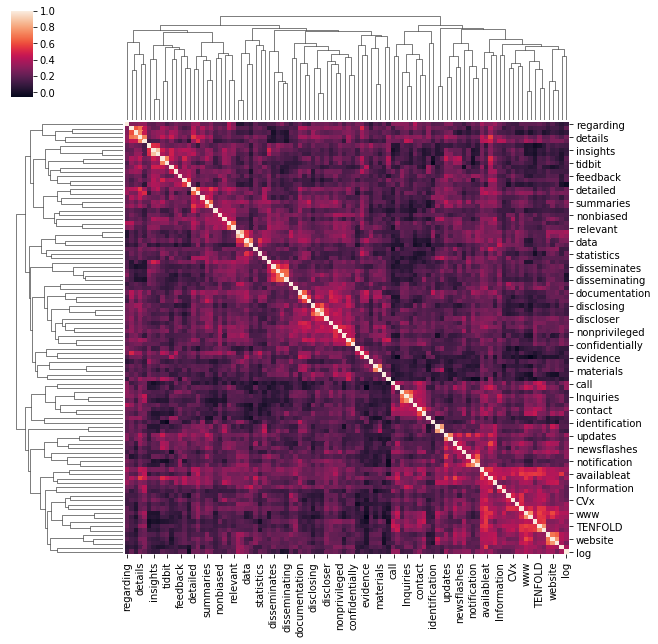

In [294]:
sns.clustermap(sim_df)

Surprisingly, a lot of the words in the matrix do not have a high level of similarity. Words that are near each other in the list of words similar to information (meaning they have a similar cosine of similarity to the word information) seem to a have a higher amount of correlation between each other, as well. This is especially true in relation to words similar to websites (like www) and words related to discovering and disseminating information.